In [81]:
import numpy as np
import scipy.io, scipy.optimize
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.svm import SVC

In [82]:
ex6data1 = scipy.io.loadmat("ex6data1.mat")
ex6data2 = scipy.io.loadmat("ex6data2.mat")
ex6data3 = scipy.io.loadmat("ex6data3.mat")

In [83]:
X1 = pd.DataFrame(ex6data1['X'])
y1 = pd.DataFrame(ex6data1['y'].ravel())
print(X1.shape)
print(y1.shape)

(51, 2)
(51, 1)


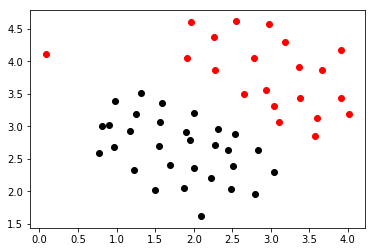

In [84]:
plt.scatter(X1[y1[0] == 1][0], X1[y1[0] == 1][1], color='red')
plt.scatter(X1[y1[0] == 0][0], X1[y1[0] == 0][1], color='black')

In [85]:
svm_clf = SVC(kernel='linear')
svm_clf.fit(X1, y1.values.ravel())

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

To plot the decision boundary (i.e., maximum-margin separating hyperplane)

http://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane.html#example-svm-plot-separating-hyperplane-py

In [86]:
svm_weights = svm_clf.coef_[0]
svm_intercept = svm_clf.intercept_[0]

In [87]:
decision_slope = -svm_weights[0]/svm_weights[1]
decision_intercept = -svm_intercept/svm_weights[1]

In [88]:
x_plot = np.arange(-0.5, 4.5, 0.1)
y_plot = decision_slope*x_plot + decision_intercept

Text(0.5,1,'Linear SVM, C=1')

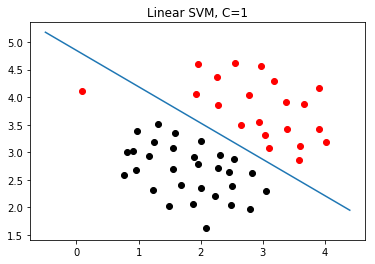

In [89]:
plt.scatter(X1[y1[0] == 1][0], X1[y1[0] == 1][1], color='red')
plt.scatter(X1[y1[0] == 0][0], X1[y1[0] == 0][1], color='black')
plt.plot(x_plot, y_plot)
plt.title("Linear SVM, C=1")

Text(0.5,1,'Linear SVM, C=100')

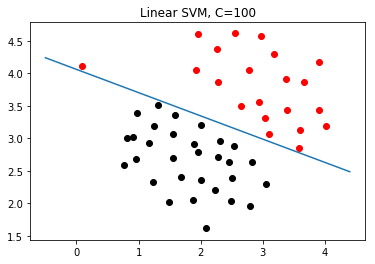

In [90]:
svm_clf = SVC(C=100.0, kernel='linear')
svm_clf.fit(X1, y1.values.ravel())
svm_weights = svm_clf.coef_[0]
svm_intercept = svm_clf.intercept_[0]
decision_slope = -svm_weights[0]/svm_weights[1]
decision_intercept = -svm_intercept/svm_weights[1]
x_plot = np.arange(-0.5, 4.5, 0.1)
y_plot = decision_slope*x_plot + decision_intercept
plt.scatter(X1[y1[0] == 1][0], X1[y1[0] == 1][1], color='red')
plt.scatter(X1[y1[0] == 0][0], X1[y1[0] == 0][1], color='black')
plt.plot(x_plot, y_plot)
plt.title("Linear SVM, C=100")

(863, 2)
(863, 1)


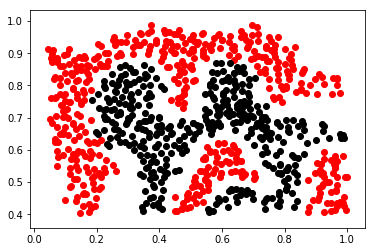

In [93]:
X2 = pd.DataFrame(ex6data2['X'])
y2 = pd.DataFrame(ex6data2['y'].ravel())
print(X2.shape)
print(y2.shape)
plt.scatter(X2[y2[0] == 1][0], X2[y2[0] == 1][1], color='red')
plt.scatter(X2[y2[0] == 0][0], X2[y2[0] == 0][1], color='black')

Using the following example code from scikit-learn documentation to plot RBF decision boundary

http://scikit-learn.org/0.16/auto_examples/svm/plot_iris.html

In [154]:
svm_RBF_clf = SVC(kernel='rbf', C=1, gamma=100)
svm_RBF_clf.fit(X2, y2.values.ravel())
xx, yy = np.meshgrid(np.arange(0, 1, 0.005), np.arange(0.4, 1, 0.005))
z = svm_RBF_clf.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)

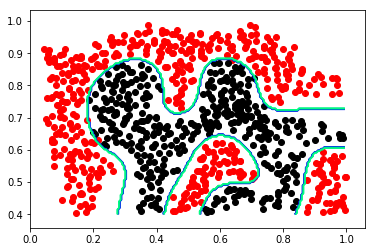

In [165]:
plt.scatter(X2[y2[0] == 1][0], X2[y2[0] == 1][1], color='red')
plt.scatter(X2[y2[0] == 0][0], X2[y2[0] == 0][1], color='black')
plt.contour(xx, yy, z, cmap='winter', linewidths=1.5)